In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [41]:
len(X_treino)

17022

In [42]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [43]:
len(X_treino_over)

31752

In [44]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [45]:
len(X_treino_under)

16856

In [46]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [47]:
len(X_treino_rd_under)

2292

In [48]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [49]:
len(X_treino_DSTO)

31752

## Parametros e funcoes

In [50]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [52]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 1.00


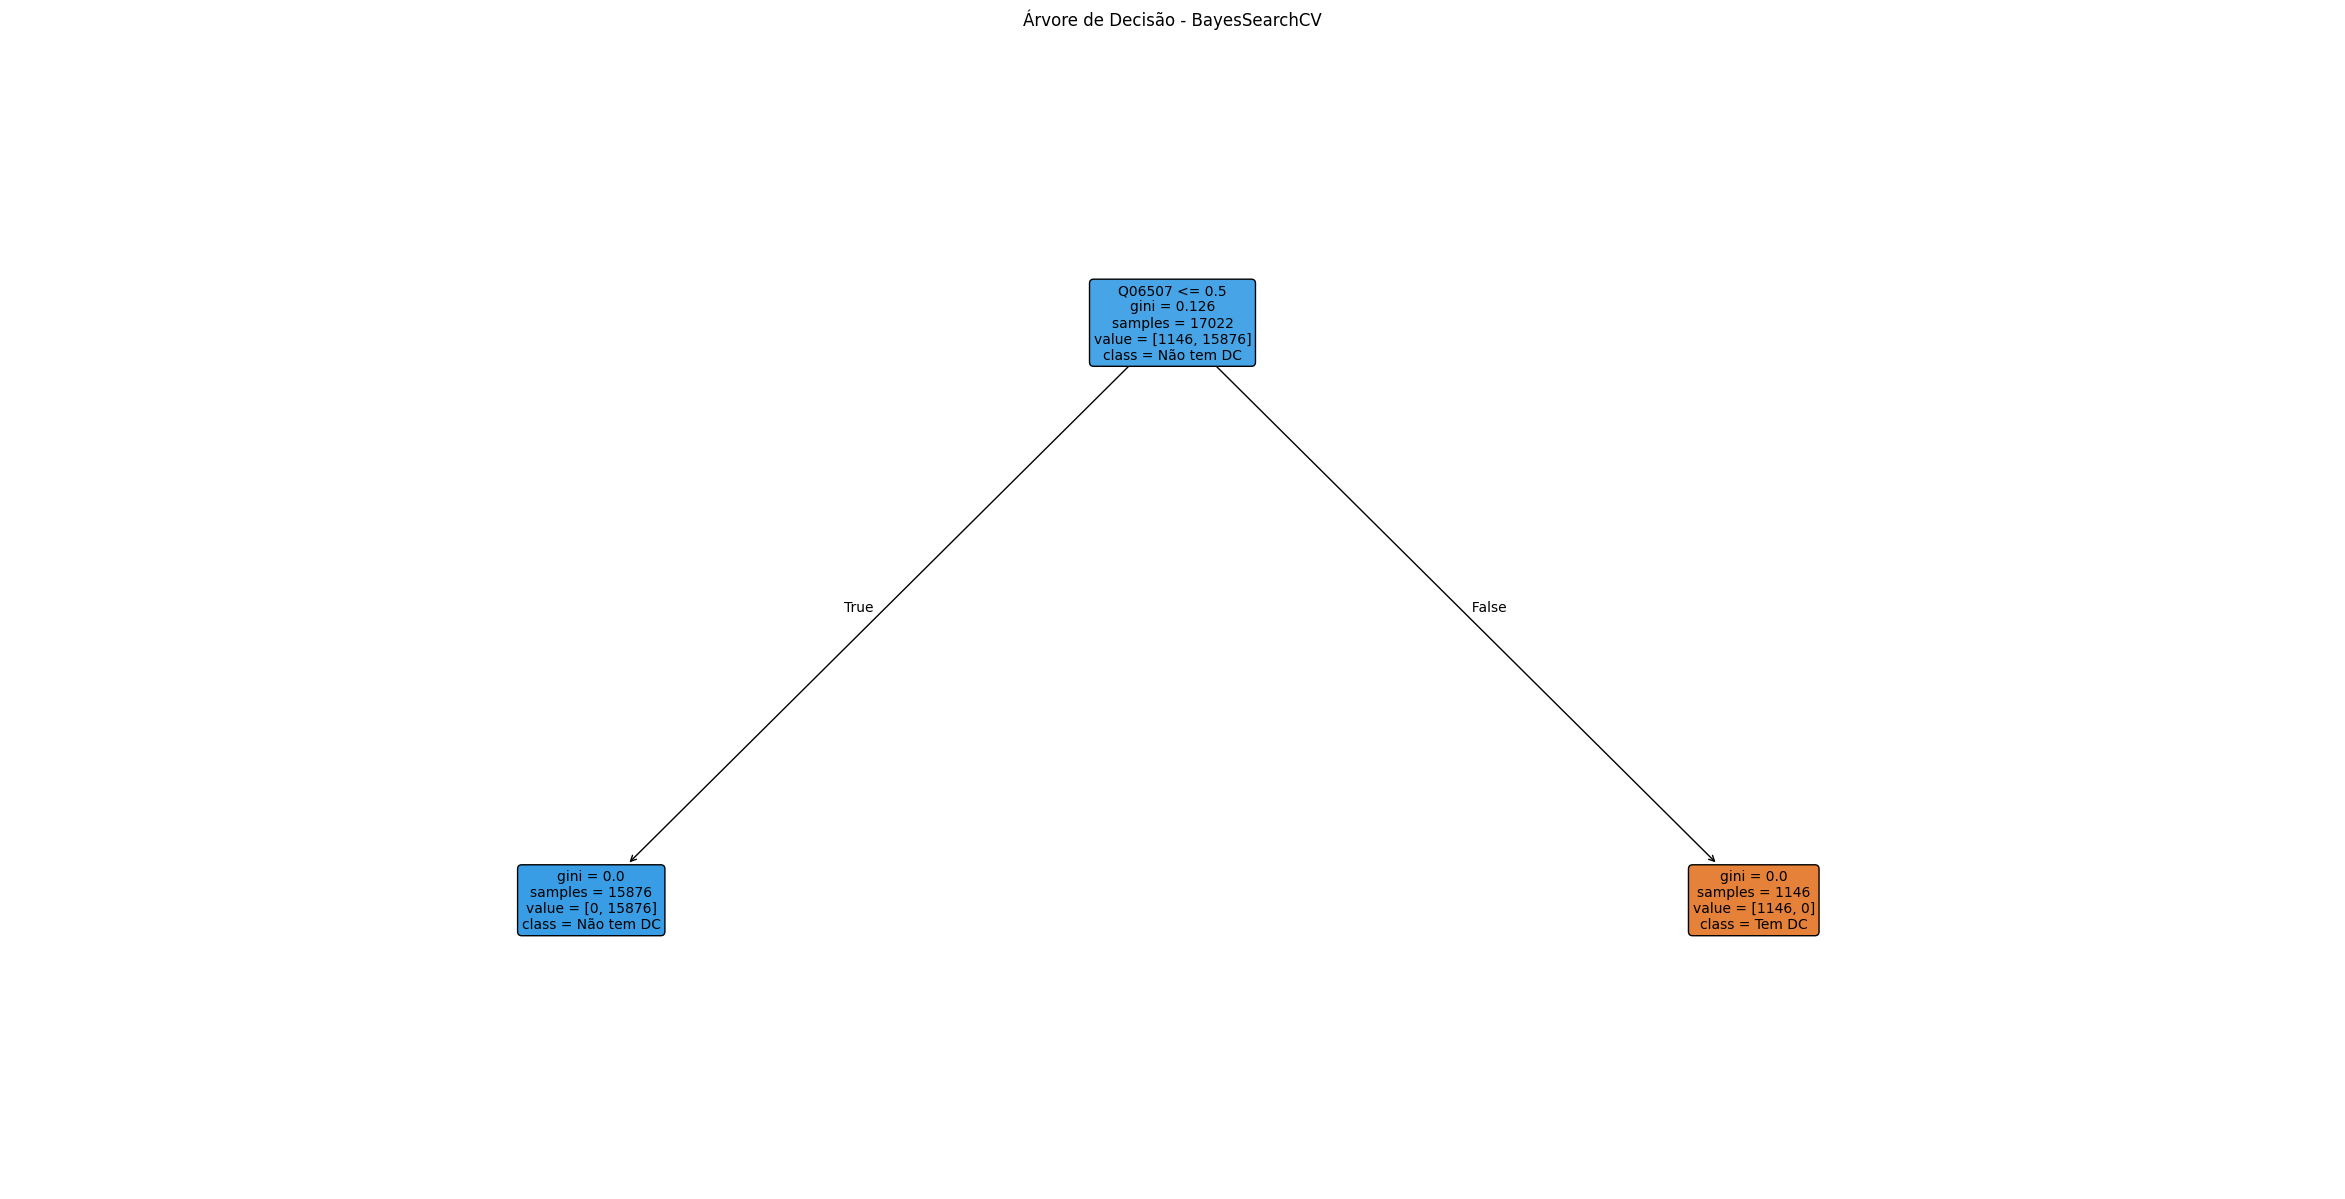

In [53]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

### Resultados

In [54]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 1.00


In [55]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



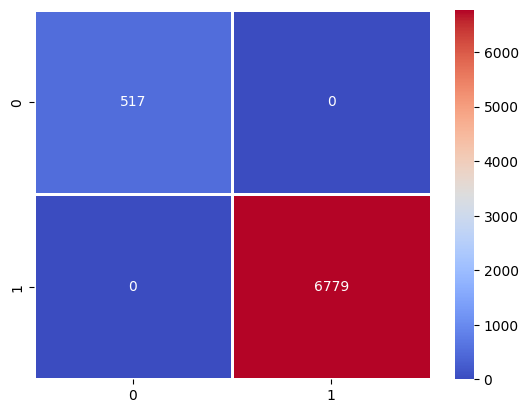

In [56]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [57]:
grid_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 1.00


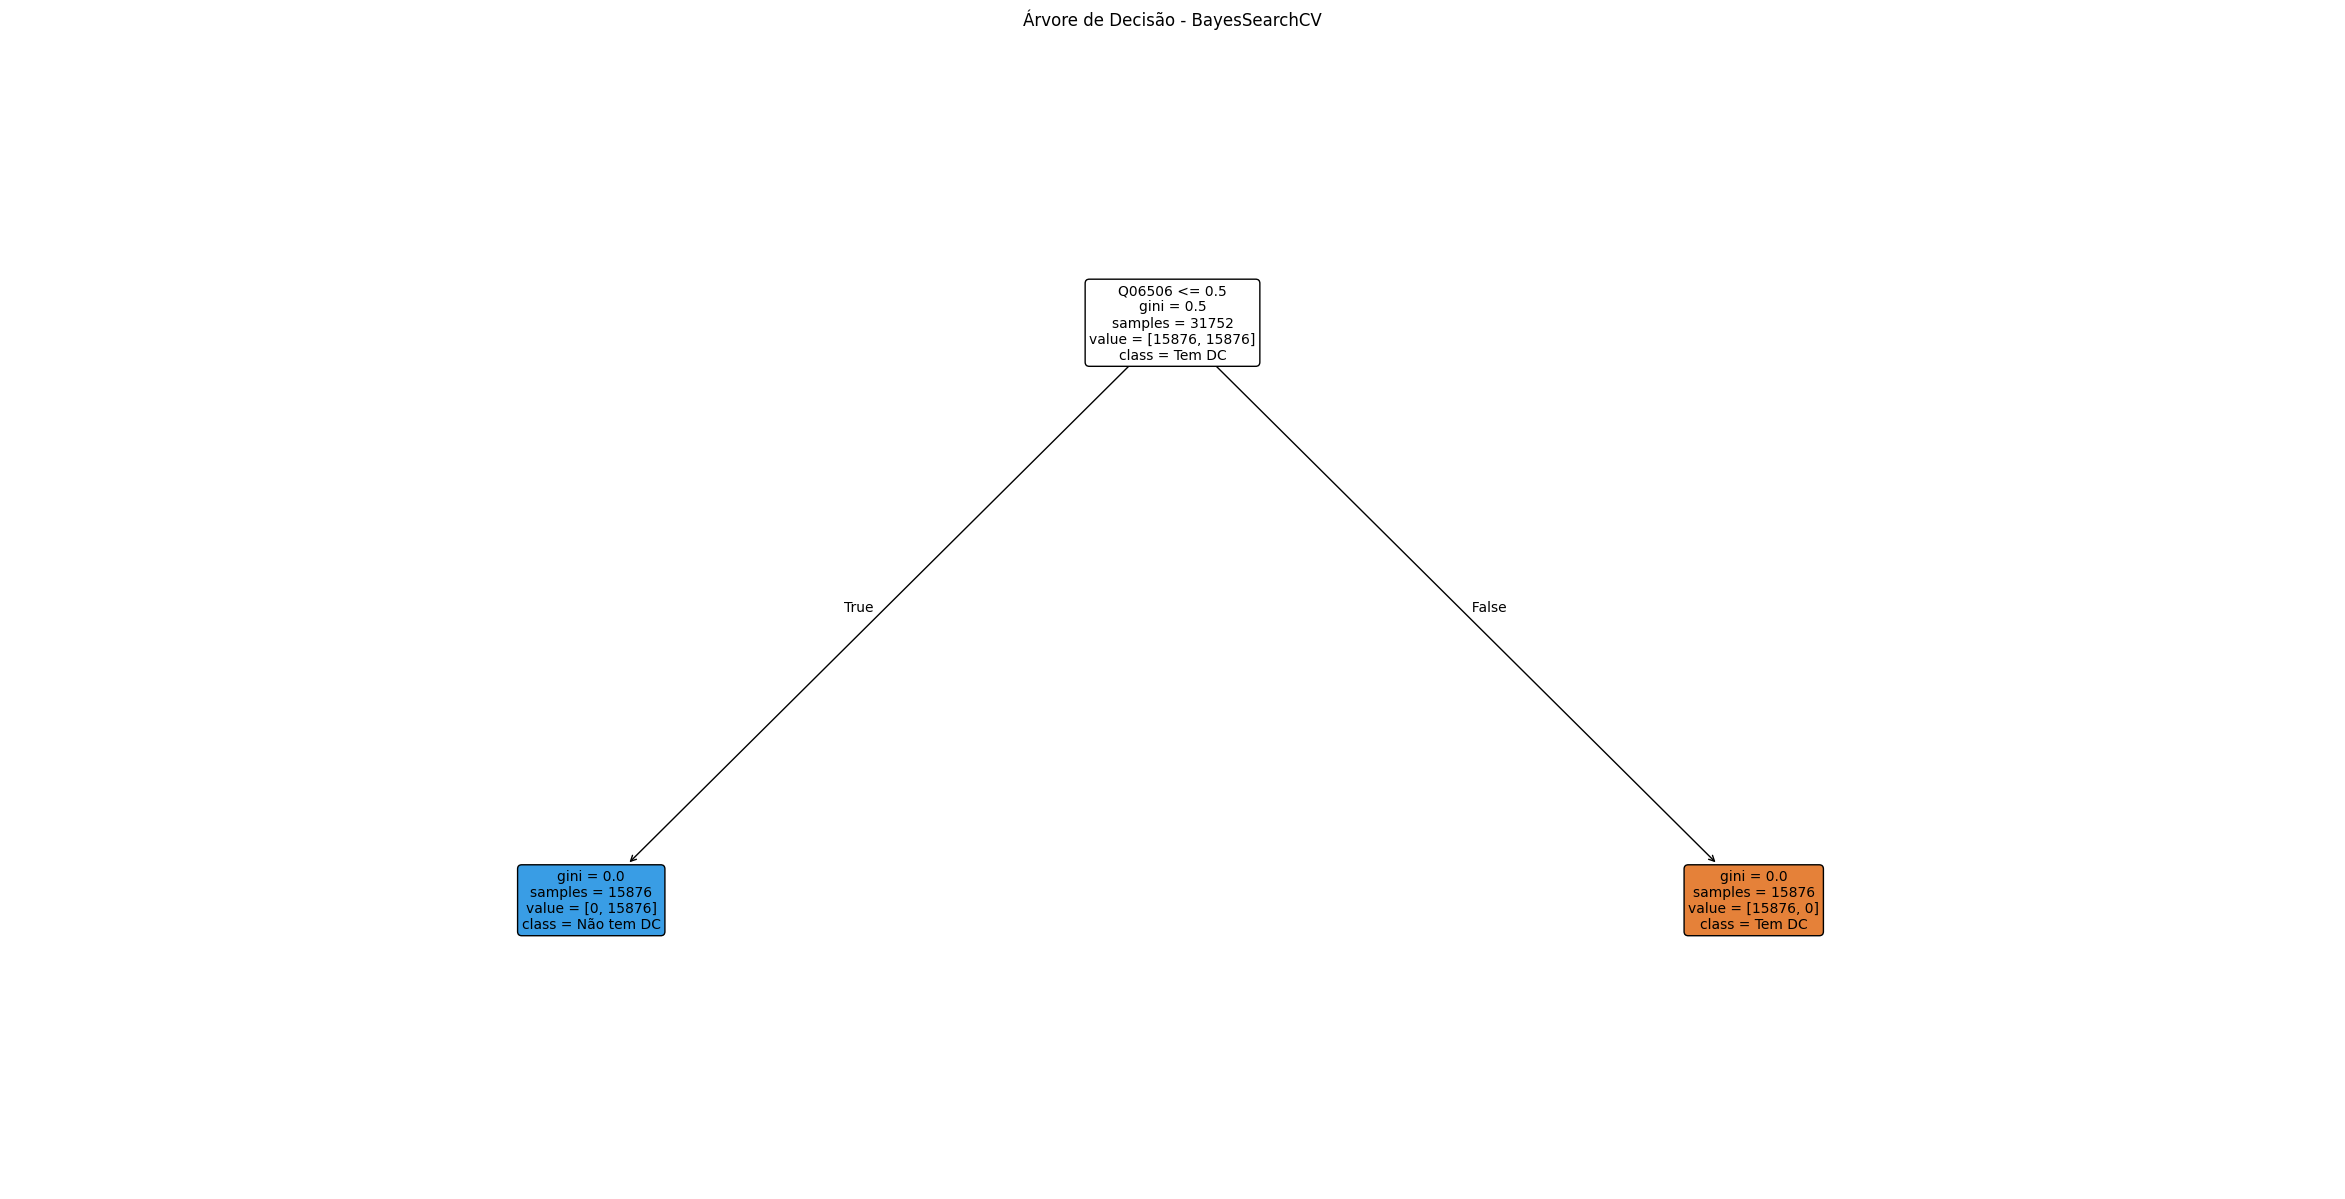

In [58]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [59]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [60]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



### UnderSampling

In [61]:
grid_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 1.00


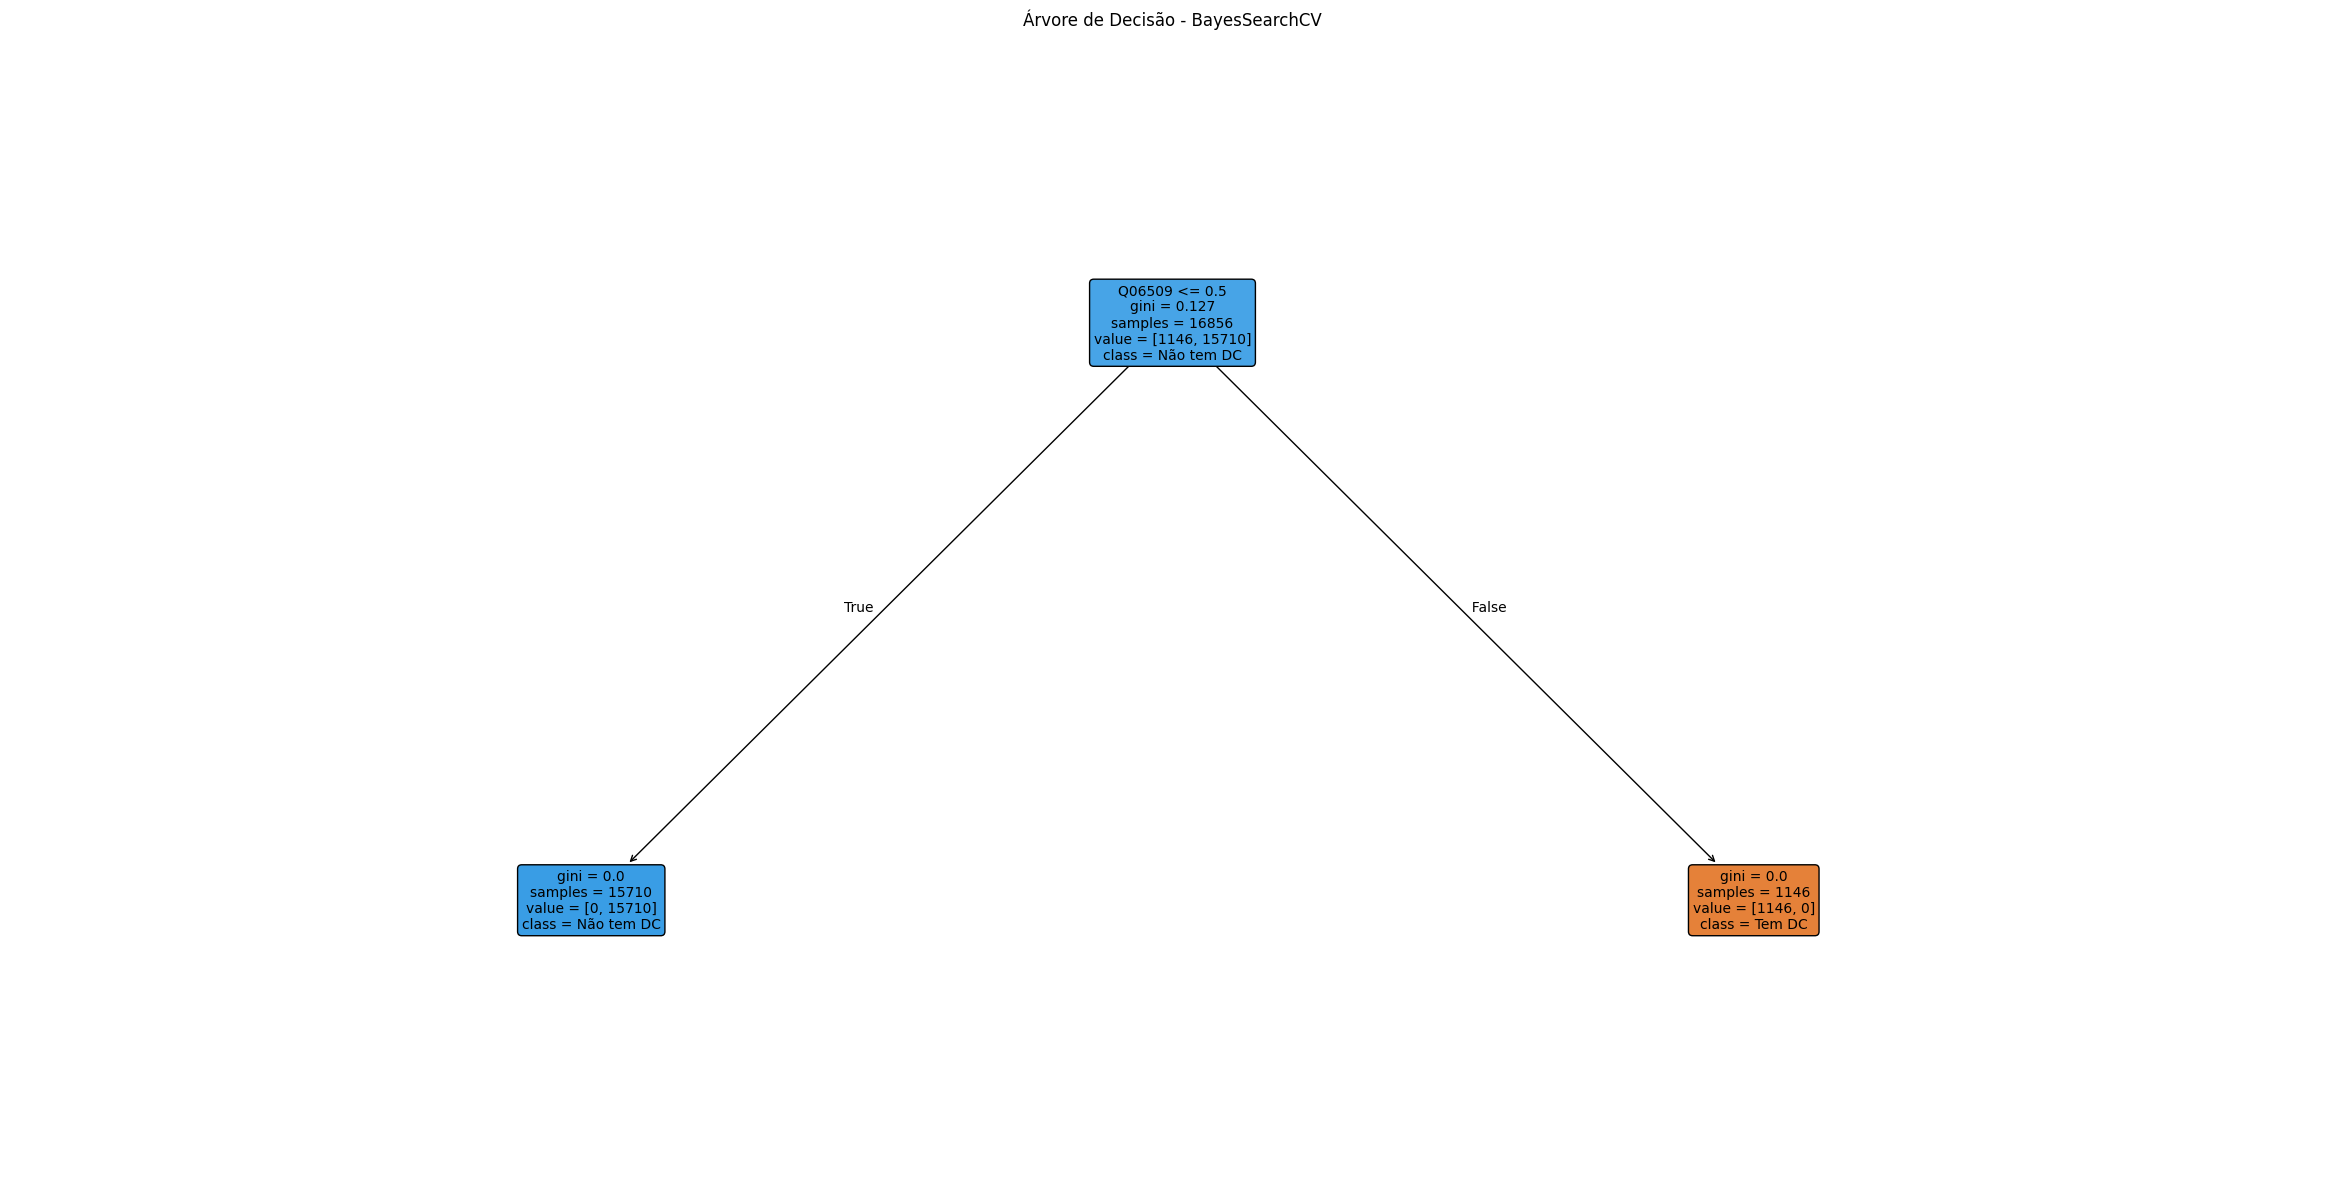

In [62]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [63]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [64]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



### Random UnderSampling

In [65]:
grid_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 1.00


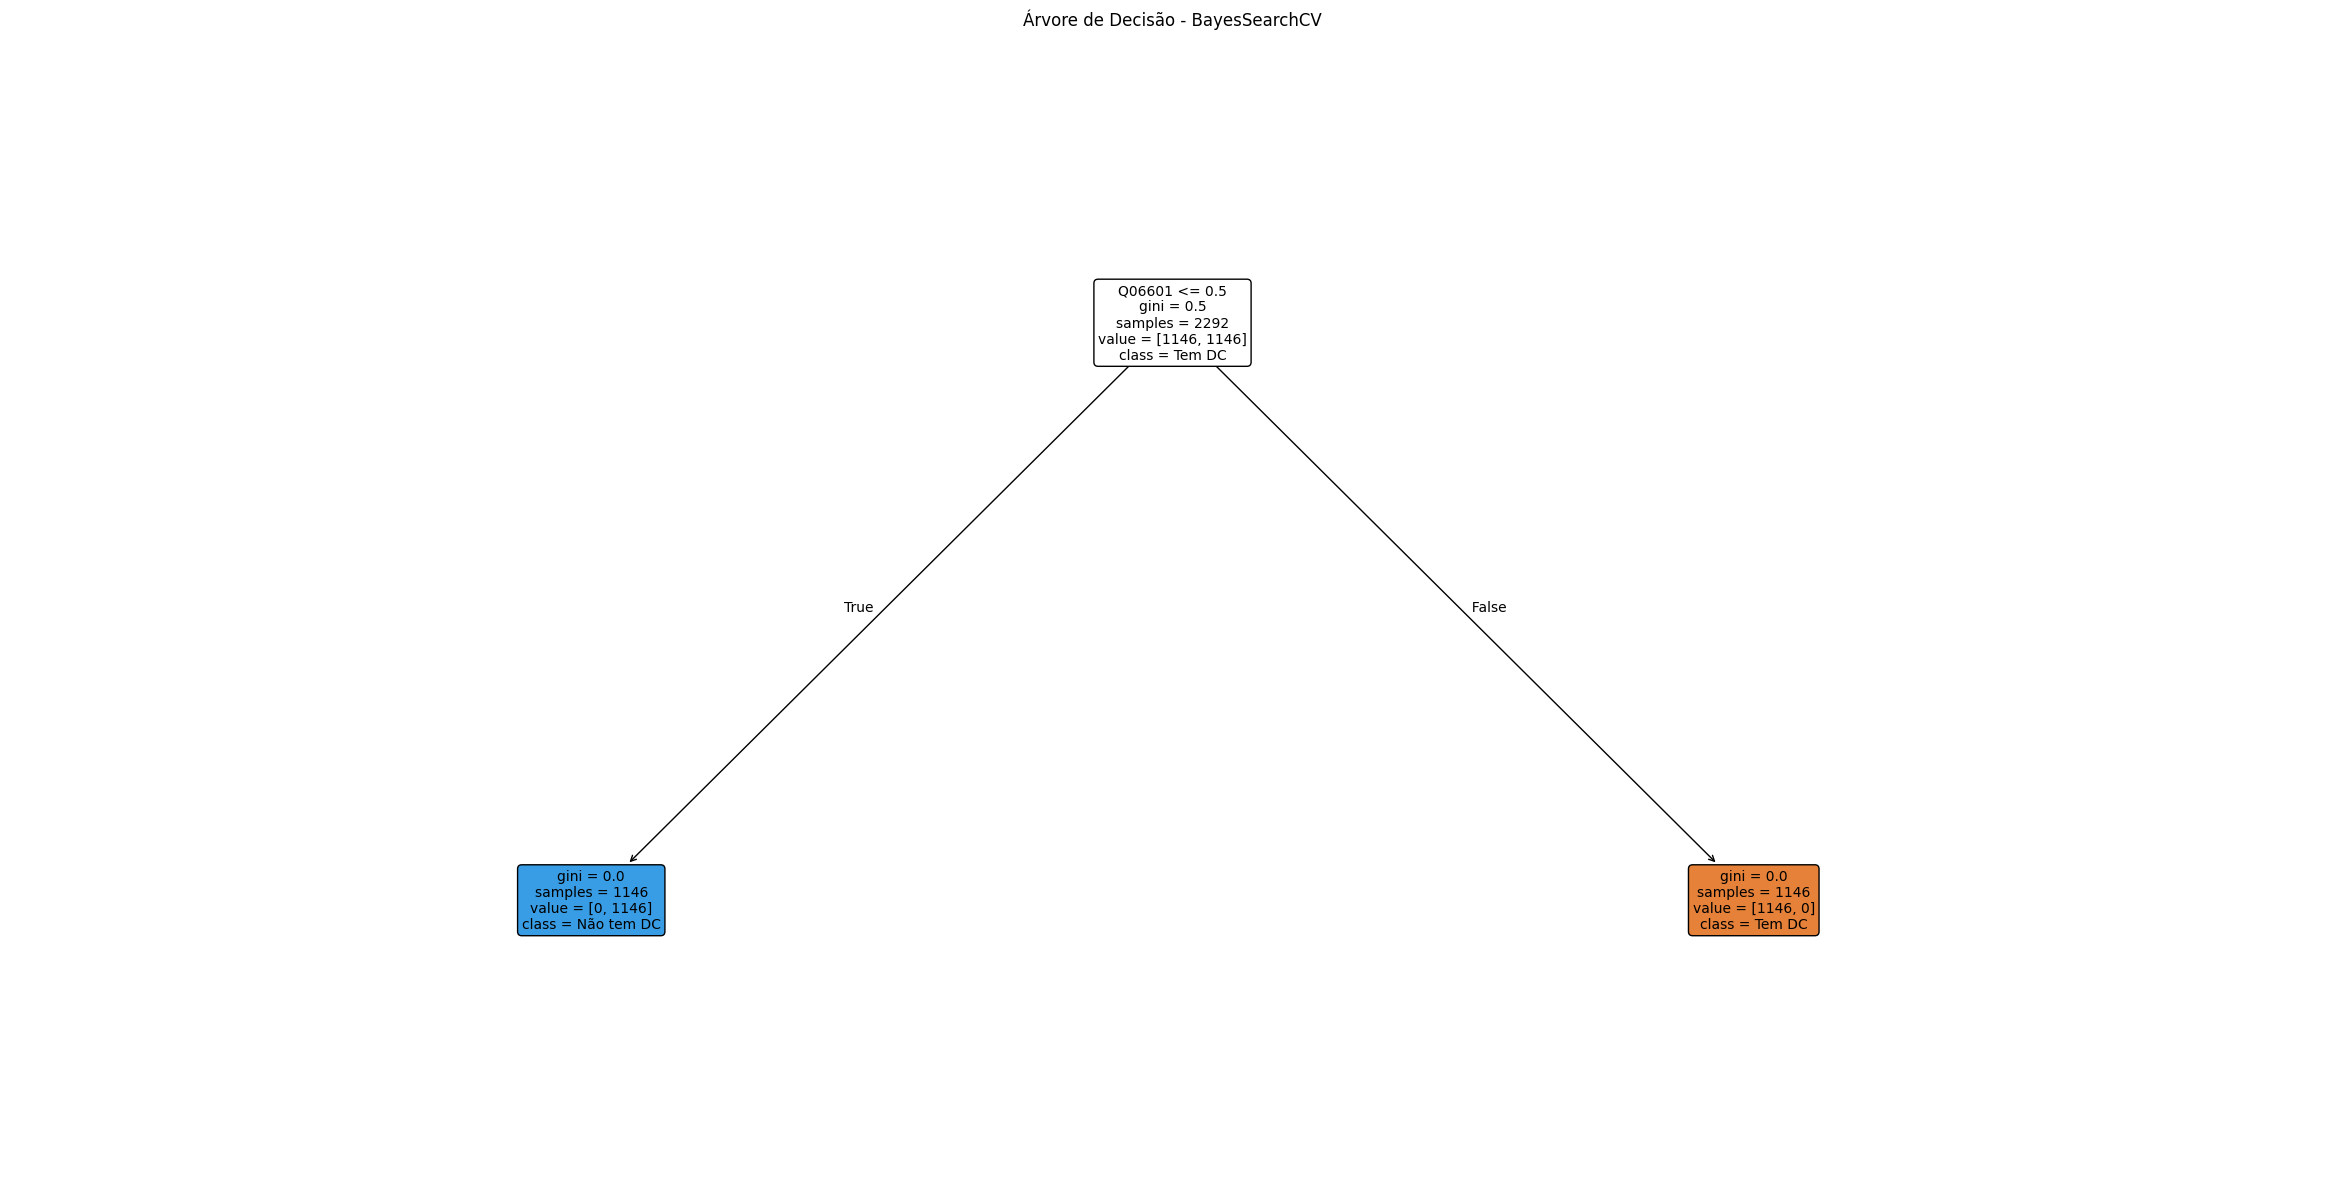

In [66]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [67]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [68]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



### DSTO

In [69]:
grid_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 1.00


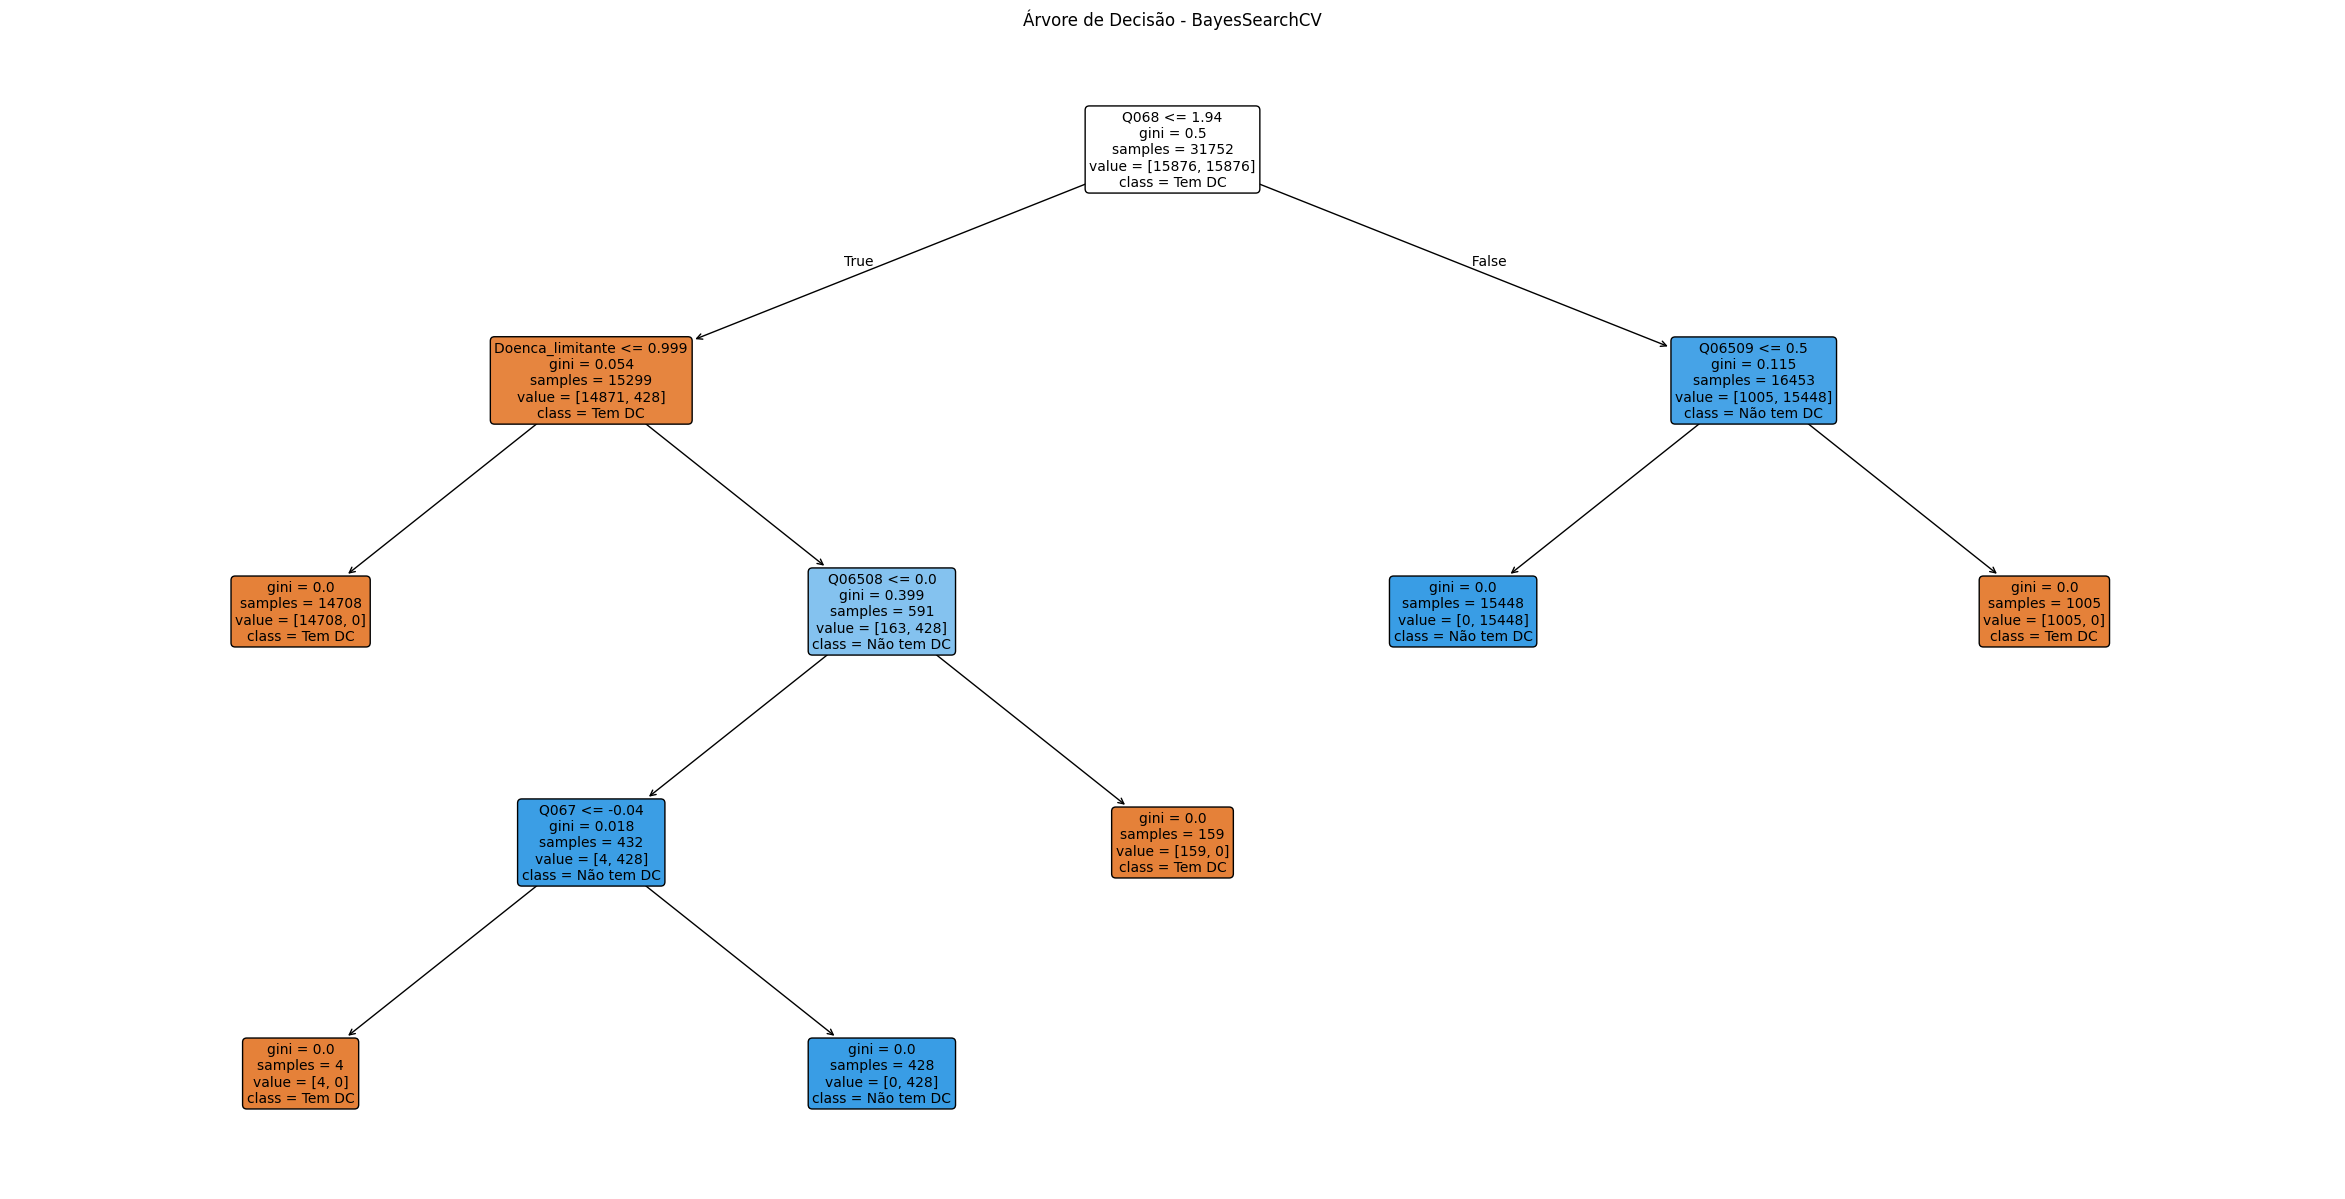

In [70]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [71]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [72]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296

